**10 numeric variables:**

- Price: Price per share of the company
- Price to Earnings (PE): The ratio of a company’s share price to its earnings per share
- Dividend Yield: The ratio of the annual dividends per share divided by the price per share
- Earnings Per Share (EPS): A company’s profit divided by the number of shares of its stock
- 52 week high and low: The annual high and low of a company’s share price
- Market Cap: The market value of a company’s shares (calculated as share price x number of shares)
- EBITDA: A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for its profitability
- Price to Sales (PS): A company’s market cap divided by its total sales or revenue over the past year
- Price to Book (PB): A company’s price per share divided by its book value

**4 character variables:**
  - Symbol: Ticker symbol used to uniquely identify each company on a particular stock market
  - Name: Legal name of the company
  - Sector: An area of the economy where businesses share a related product or service
  - SEC Filings: Helpful documents relating to a company

# **Data Cleaning And Visualizing**


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../financials/financials.csv")
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [4]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

<AxesSubplot:>

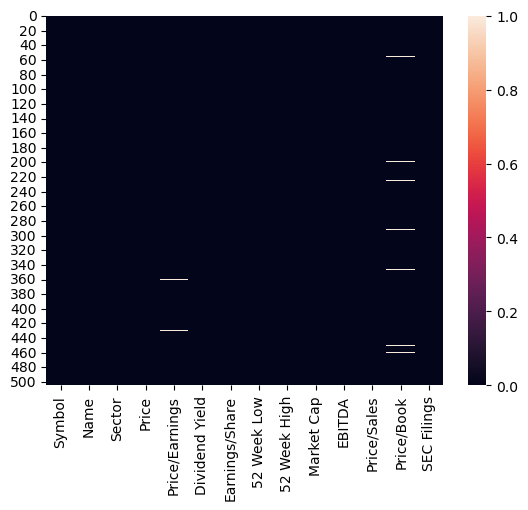

In [5]:
sns.heatmap(df.isnull())

In [6]:
df["Price/Book"].fillna(df["Price/Book"].mean(), inplace=True)
df["Price/Earnings"].fillna(df["Price/Earnings"].mean(), inplace=True)

In [7]:
df["Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

## ***Sectoral Ranking***

In [8]:
group_sector = df.groupby(["Sector"])[["Name"]].count()
group_sector.sort_values(by="Name", ascending=False)

,Name
Sector,
Consumer Discretionary,84
Information Technology,70
Financials,68
Industrials,67
Health Care,61
Consumer Staples,34
Real Estate,33
Energy,32
Utilities,28


In [9]:
import plotly.express as px

fig = px.histogram(df , x="Sector", color="Sector", template="plotly_dark")
fig

*We grouped the sectors and showed them in the graph. First of all, Consumer Demand, Information Technologies and Finance sectors are the sectors with the highest other sectors.*

## ***Stock price trend (percentage) by sector***

In [10]:

fig = px.pie(df, values="Price", names='Sector', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [11]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [12]:
earnings_group = df.groupby(["Sector","Name"])[["Price","Price/Earnings", "Dividend Yield"]].sum()
earnings_group

Price  Price/Earnings  \
Sector                 Name                                            
Consumer Discretionary Advance Auto Parts     109.63           19.54   
                       Amazon.com Inc        1350.50          296.16   
                       Aptiv Plc               89.27           69.74   
                       AutoZone Inc           718.57           16.31   
                       Best Buy Co. Inc.       68.79           19.22   
...                                              ...             ...   
Utilities              SCANA Corp              35.60            8.75   
                       Sempra Energy          103.36           19.14   
                       Southern Co.            43.40           15.78   
                       Wec Energy Group Inc    59.50           19.57   
                       Xcel Energy Inc         42.44           18.14   

                                             Dividend Yield  
Sector                 Name                                  
Consumer Discretionary Advance Auto Parts          0.218321  
                       Amazon.com Inc              0.000000  
                       Aptiv Plc                   0.939268  
                       AutoZone Inc                0.000000  
                       Best Buy Co. Inc.           1.908504  
...                                                     ...  
Utilities              SCANA Corp                  6.683033  
                       Sempra Energy               3.160726  
                       Southern Co.                5.353023  
                       Wec Energy Group Inc        3.691948  
                       Xcel Energy Inc             3.391427  

[505 rows x 3 columns]

*We analyzed the Price/Earnings and Dividend Yield of the companies we grouped.*


## ***Market Capitalization by Sector***


In [13]:
fig = px.histogram(df, x="Sector", y= "Market Cap", color= "Sector", template="plotly_dark" )
fig.show()

*Market capitalization is the total value of a company's outstanding shares at any given time. It is calculated by multiplying the number of shares outstanding by the price of each individual share. Market value is used to size corporations and understand their aggregate market value.*

In [14]:
fig = px.histogram(df, x="Sector", y= "EBITDA", color= "Sector", template="plotly_dark" )
fig.show()

*EBITDA it is a financial indicator to measure the results of a company, that is, how much money it makes from its main activities. Therefore, it shows investors whether this company is efficient.*

In [15]:
Sector = df[["Sector","Name","Price","Price/Earnings","Dividend Yield"]]
Sector.head()

Top_10_Company_Earnings = df[["Name","Price/Earnings"]].sort_values(by="Price/Earnings", ascending=False).head(10)
Top_10_Company_Earnings

,Name,Price/Earnings
403,Salesforce.com,520.15
64,"Baker Hughes, a GE Company",305.56
30,Amazon.com Inc,296.16
475,Vertex Pharmaceuticals Inc,252.67
171,EOG Resources,246.44
326,Netflix Inc.,200.08
404,SBA Communications,199.81
346,Occidental Petroleum,195.63
9,Advanced Micro Devices Inc,187.00
103,Charter Communications,162.92


*The profit and dividend rate that companies leave to their users according to industry information. Sorted from highest to lowest.*

## ***Dividend rates of sectors***

In [16]:
fig = px.pie(Sector, values="Dividend Yield", names="Sector", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

*The ratio of the annual dividends per share divided by the price per share. Is the amount of money a company pays shareholders for owning a share of its stock divided by its current stock price. It's important for investors to keep in mind that higher dividend yields do not always indicate attractive investment opportunities because the dividend yield of a stock may be elevated as a result of a declining stock price.*

In [17]:
fig = px.histogram(Top_10_Company_Earnings, x=Top_10_Company_Earnings["Name"], y=Top_10_Company_Earnings["Price/Earnings"],  color="Name", template="plotly_dark")
fig.show()

*Chart of top 10 earning companies*

## ***Price/Sales By Sector*** 

In [18]:
fig = px.scatter(df,x="Price/Sales", y="Sector", labels="Name", color="Sector", size="Price/Sales")
fig.show()

*The price-to-sales ratio (Price/Sales or P/S) is calculated by taking a company's market capitalization (the number of outstanding shares multiplied by the share price) and dividing it by the company's total sales or revenue over the past 12 months.*

# ***Correlations***


<AxesSubplot:>

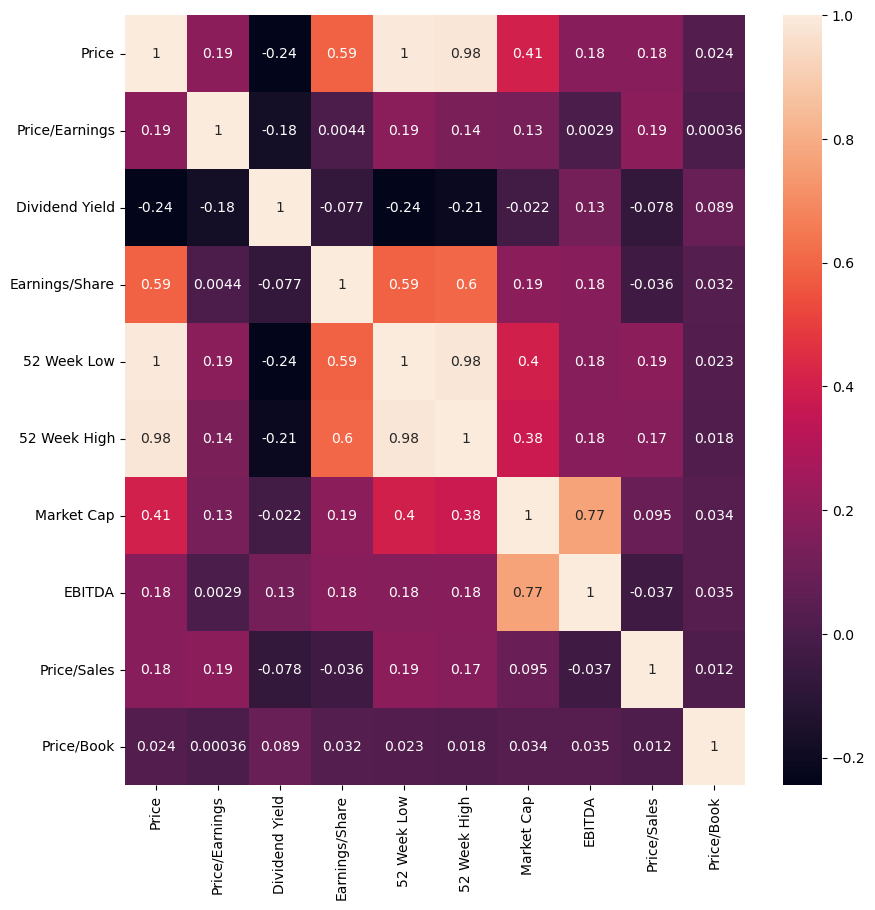

In [19]:
filter = df.drop(["Symbol", "Name"], axis=1)
cor = filter.corr()

plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)

# **Machine Learning Part** 

## ***Top 5 Companies by EPS***

In [20]:
top_5 = df.nlargest(5, "Earnings/Share")
top_5


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
61,AZO,AutoZone Inc,Consumer Discretionary,718.57,16.31,0.000000,44.09,797.89,491.13,1.992202e+10,2.347304e+09,1.851043,136.23,http://www.sec.gov/cgi-bin/browse-edgar?action...
372,PCLN,Priceline.com Inc,Consumer Discretionary,1806.06,24.26,0.000000,42.66,2067.99,1589.00,9.181745e+10,4.803487e+09,9.176564,6.92,http://www.sec.gov/cgi-bin/browse-edgar?action...
23,AGN,"Allergan, Plc",Health Care,164.20,10.65,1.643289,38.35,256.80,160.07,5.666883e+10,-2.888100e+09,4.820115,0.83,http://www.sec.gov/cgi-bin/browse-edgar?action...
103,CHTR,Charter Communications,Consumer Discretionary,348.65,162.92,0.000000,34.08,408.83,308.30,8.670888e+10,1.469400e+10,2.120863,2.27,http://www.sec.gov/cgi-bin/browse-edgar?action...
73,BLK,BlackRock,Financials,509.38,22.49,2.164356,30.30,594.52,368.00,8.590776e+10,5.684000e+09,6.915820,2.95,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [21]:
fig = px.funnel(top_5, x="Earnings/Share", y="Name", color="Sector", template="plotly_dark" )
fig.show()

#### ***Top 5 Companies by Dividend Yield***


In [22]:
top_5 = df[df["Dividend Yield"] <= 5]
top_5  = top_5.nlargest(5, "Dividend Yield")
top_5

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
10,AES,AES Corp,Utilities,10.06,9.96,4.961832,-1.72,12.05,10.00,6.920851e+09,3.001000e+09,0.659514,2.20,http://www.sec.gov/cgi-bin/browse-edgar?action...
290,MAC,Macerich,Real Estate,58.36,14.81,4.917760,3.43,69.73,52.12,8.473119e+09,5.031830e+08,11.394877,2.24,http://www.sec.gov/cgi-bin/browse-edgar?action...
169,ETR,Entergy Corp.,Utilities,72.02,10.65,4.892126,-3.26,87.95,69.63,1.311689e+10,8.807000e+08,1.554312,1.54,http://www.sec.gov/cgi-bin/browse-edgar?action...
275,LB,L Brands Inc.,Consumer Discretionary,47.77,12.77,4.886988,3.98,63.10,35.00,1.386204e+10,2.329000e+09,1.706098,1403.38,http://www.sec.gov/cgi-bin/browse-edgar?action...
157,DUK,Duke Energy,Utilities,74.32,16.70,4.784946,3.12,91.80,72.93,5.207819e+10,9.895000e+09,2.934886,1.27,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [23]:
fig = px.histogram(top_5, x="Name", y="Dividend Yield", color="Sector", template="plotly_dark", log_y=True)
fig.show()

In [24]:
top_5 = df.nlargest(5, "EBITDA")
top_5

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.10,131.12,8.095080e+11,7.938600e+10,3.458609,5.66,http://www.sec.gov/cgi-bin/browse-edgar?action...
58,T,AT&T Inc,Telecommunication Services,35.57,12.14,5.415651,4.76,42.70,32.55,2.267133e+11,4.965300e+10,1.408315,1.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
474,VZ,Verizon Communications,Telecommunication Services,49.04,13.08,4.626544,7.36,54.77,42.80,2.080923e+11,4.574500e+10,1.645254,7.96,http://www.sec.gov/cgi-bin/browse-edgar?action...
311,MSFT,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.07,63.22,6.899784e+11,4.107900e+10,7.113097,9.49,http://www.sec.gov/cgi-bin/browse-edgar?action...
185,XOM,Exxon Mobil Corp.,Energy,76.07,21.37,4.003120,1.88,89.30,76.05,3.261487e+11,3.905200e+10,1.770194,1.85,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [25]:
fig = px.funnel(top_5, x="EBITDA", y="Name", color="Sector", template="plotly_dark")
fig.show()

In [26]:
wor_10 = df.nsmallest(10, "EBITDA")
wor_10

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
193,FE,FirstEnergy Corp,Utilities,30.64,11.18,4.673807,-14.49,35.22,27.930,1.370608e+10,-5.067000e+09,1.299448,2.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
23,AGN,"Allergan, Plc",Health Care,164.20,10.65,1.643289,38.35,256.80,160.070,5.666883e+10,-2.888100e+09,4.820115,0.83,http://www.sec.gov/cgi-bin/browse-edgar?action...
229,HES,Hess Corporation,Energy,43.00,-9.33,2.267060,-19.94,55.48,37.250,1.401613e+10,-8.190000e+08,3.780475,1.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
336,NBL,Noble Energy Inc,Energy,25.43,105.96,1.477105,-2.32,39.60,22.985,1.317733e+10,-5.180000e+08,4.697645,1.44,http://www.sec.gov/cgi-bin/browse-edgar?action...
143,XRAY,Dentsply Sirona,Health Care,56.85,22.65,0.600343,1.99,68.98,52.535,1.339051e+10,-4.111000e+08,4.626262,1.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
59,ADSK,Autodesk Inc,Information Technology,104.81,-77.07,0.000000,-2.61,131.10,81.750,2.434829e+10,-3.781000e+08,16.506820,224.13,http://www.sec.gov/cgi-bin/browse-edgar?action...
209,GE,General Electric,Industrials,14.45,13.76,3.147541,-0.72,30.59,14.710,1.322493e+11,-2.060000e+08,1.088761,1.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
299,MAT,Mattel Inc.,Consumer Discretionary,16.00,-14.68,0.000000,-3.06,26.30,12.710,5.843402e+09,-2.035990e+08,1.186372,3.87,http://www.sec.gov/cgi-bin/browse-edgar?action...
245,INCY,Incyte,Health Care,83.92,-119.89,0.000000,0.54,153.15,84.210,1.822096e+10,-8.168600e+07,17.026990,10.25,http://www.sec.gov/cgi-bin/browse-edgar?action...
13,AFL,AFLAC Inc,Financials,83.25,12.24,2.429907,11.01,91.73,68.800,3.342295e+10,0.000000e+00,1.542934,1.53,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [27]:
fig = px.histogram(wor_10, x="EBITDA", y="Name", color="Sector", template="plotly_dark")
fig.show()

## ***Group Of Companies***

In [28]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [29]:
x_companies = df.drop(["Symbol", "Name", "Sector", "SEC Filings"], axis=1)
x_companies.head()


,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62


In [30]:
scaler = StandardScaler()
x_companies_scaled = scaler.fit_transform(x_companies)

x_companies_scaled

array([[ 0.88655447, -0.01212084,  0.28450258, ...,  0.79863296,
         0.12976765, -0.03503545],
       [-0.32458993,  0.0717832 , -0.48707325, ..., -0.43743487,
        -0.10594623, -0.09119249],
       [-0.35415183, -0.05589686,  0.00848407, ...,  0.31515148,
        -0.05821324, -0.12675487],
       ...,
       [ 0.08711726, -0.25507777, -0.71701891, ..., -0.23163331,
        -0.22472696, -0.135758  ],
       [-0.39555339, -0.17214652, -0.2702499 , ..., -0.5253805 ,
        -0.04256271, -0.1466743 ],
       [-0.24066987,  0.19435606, -0.79025078, ..., -0.27164052,
         1.54459967,  0.04092848]])

In [31]:
wcss = []

for i in range(1,5): 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_companies_scaled)
    wcss.append(kmeans.inertia_)

fig = px.line(x= range(1,5), y=wcss)
fig.show()


In [32]:
clusters = KMeans(n_clusters=4)
labels = kmeans.fit_predict(x_companies_scaled)

fig = px.scatter(x = x_companies_scaled[:,0], y= x_companies_scaled[:, 1], color=labels)
fig.show()

In [33]:
clusters_center = pd.DataFrame(data= kmeans.cluster_centers_, columns=[x_companies.columns])
clusters_center

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,-0.280278,-0.109705,0.137846,-0.219796,-0.285054,-0.269745,-0.137149,-0.056018,-0.299533,-0.089522
1,8.843379,1.781176,-1.234593,3.446222,8.795256,8.745545,5.677720,2.689043,0.789134,-0.048512
2,0.616545,0.300298,-0.438039,0.598372,0.633223,0.584578,0.247124,0.082271,0.959438,0.034896
3,-0.221533,-0.176159,1.765836,0.083798,-0.188771,-0.167643,0.383299,0.508529,-0.494671,15.154375


In [34]:
clusters_center = scaler.inverse_transform(clusters_center)
clusters_center = pd.DataFrame(data=clusters_center, columns=[x_companies.columns])
clusters_center

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,66.190838,20.297505,2.107643,2.504555,78.381130,55.045976,3.690136e+10,3.207513e+09,2.906316,6.498401
1,1291.447500,98.047500,0.000000,23.340000,1487.720000,1007.247575,5.600126e+11,2.196662e+10,6.669491,10.142500
2,186.629231,37.156154,1.223260,7.154530,220.905243,145.280155,7.147096e+10,4.152551e+09,7.258179,17.553986
3,74.080000,17.565000,4.607734,4.230000,93.325000,65.830000,8.372136e+10,7.065500e+09,2.231783,1361.040000


In [35]:
df_cluster = pd.concat([df, pd.DataFrame({"cluster": labels})], axis=1)
df_cluster

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,cluster
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,2
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,0
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,0
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,0
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...,0
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...,0
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...,0
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...,0


In [36]:
df_cluster.drop(["SEC Filings"], axis = 1, inplace = True)


In [37]:
df_cluster.nlargest(10, "EBITDA")

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,cluster
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.10,131.1200,8.095080e+11,7.938600e+10,3.458609,5.66,2
58,T,AT&T Inc,Telecommunication Services,35.57,12.14,5.415651,4.76,42.70,32.5500,2.267133e+11,4.965300e+10,1.408315,1.80,0
474,VZ,Verizon Communications,Telecommunication Services,49.04,13.08,4.626544,7.36,54.77,42.8000,2.080923e+11,4.574500e+10,1.645254,7.96,0
311,MSFT,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.07,63.2200,6.899784e+11,4.107900e+10,7.113097,9.49,2
185,XOM,Exxon Mobil Corp.,Energy,76.07,21.37,4.003120,1.88,89.30,76.0500,3.261487e+11,3.905200e+10,1.770194,1.85,0
27,GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.00,824.3000,7.338240e+11,3.421700e+10,6.801692,4.70,1
28,GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.89,803.1903,7.285356e+11,3.271400e+10,6.772653,4.67,1
480,WMT,Wal-Mart Stores,Consumer Staples,100.02,23.10,1.983471,4.39,109.98,66.8900,3.046809e+11,3.072100e+10,0.820994,3.89,0
105,CVX,Chevron Corp.,Energy,112.30,27.52,3.885853,4.85,133.88,102.5500,2.189788e+11,2.887700e+10,1.648986,1.71,0
122,CMCSA,Comcast Corp.,Consumer Discretionary,38.19,18.54,1.892902,4.74,44.00,34.7800,1.864770e+11,2.867500e+10,2.179775,2.65,0


In [38]:
df_cluster[df_cluster["cluster"] == 3].nlargest(10, "EBITDA")


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,cluster
363,PM,Philip Morris International,Consumer Staples,100.39,22.36,4.328479,4.48,123.55,96.66,1.535807e+11,1.180200e+10,2.757468,1318.70,3
275,LB,L Brands Inc.,Consumer Discretionary,47.77,12.77,4.886988,3.98,63.10,35.00,1.386204e+10,2.329000e+09,1.706098,1403.38,3


In [39]:
df_cluster[df_cluster["cluster"] == 2].nlargest(10, "EBITDA")


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,cluster
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.100,131.12,8.095080e+11,7.938600e+10,3.458609,5.66,2
311,MSFT,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.070,63.22,6.899784e+11,4.107900e+10,7.113097,9.49,2
187,FB,"Facebook, Inc.",Information Technology,171.58,27.90,0.000000,5.39,195.320,132.44,5.234230e+11,2.362400e+10,13.241967,7.08,2
261,JNJ,Johnson & Johnson,Health Care,126.36,17.31,2.556688,0.39,148.320,113.15,3.530625e+11,2.243000e+10,4.632622,4.74,2
462,UNH,United Health Group Inc.,Health Care,216.46,21.47,1.328492,10.71,250.790,156.49,2.188348e+11,1.745400e+10,1.090332,4.71,2
233,HD,Home Depot,Consumer Discretionary,181.22,28.10,1.861049,6.46,207.605,136.82,2.233786e+11,1.651300e+10,2.896440,84.08,2
103,CHTR,Charter Communications,Consumer Discretionary,348.65,162.92,0.000000,34.08,408.830,308.30,8.670888e+10,1.469400e+10,2.120863,2.27,2
477,V,Visa Inc.,Information Technology,113.86,32.72,0.702048,2.80,126.880,84.88,2.700387e+11,1.308600e+10,14.433654,9.40,2
75,BA,Boeing Company,Industrials,329.66,27.29,1.964840,13.47,361.450,163.69,2.056174e+11,1.247600e+10,2.156061,182.86,2
41,AMGN,Amgen Inc,Health Care,173.12,13.76,2.975151,2.57,201.230,152.16,1.281333e+11,1.194500e+10,5.581920,3.91,2


In [40]:
df_cluster[df_cluster["cluster"] == 1].nlargest(10, "EBITDA")


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,cluster
27,GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.0,22.27,1198.00,824.3000,7.338240e+11,3.421700e+10,6.801692,4.70,1
28,GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.0,22.27,1186.89,803.1903,7.285356e+11,3.271400e+10,6.772653,4.67,1
30,AMZN,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.0,6.16,1498.00,812.5000,6.858734e+11,1.613200e+10,3.927053,24.28,1
372,PCLN,Priceline.com Inc,Consumer Discretionary,1806.06,24.26,0.0,42.66,2067.99,1589.0000,9.181745e+10,4.803487e+09,9.176564,6.92,1


In [41]:
df_cluster[df_cluster["cluster"] == 0].nlargest(10, "EBITDA")


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,cluster
58,T,AT&T Inc,Telecommunication Services,35.57,12.14,5.415651,4.76,42.70,32.550,2.267133e+11,4.965300e+10,1.408315,1.80,0
474,VZ,Verizon Communications,Telecommunication Services,49.04,13.08,4.626544,7.36,54.77,42.800,2.080923e+11,4.574500e+10,1.645254,7.96,0
185,XOM,Exxon Mobil Corp.,Energy,76.07,21.37,4.003120,1.88,89.30,76.050,3.261487e+11,3.905200e+10,1.770194,1.85,0
480,WMT,Wal-Mart Stores,Consumer Staples,100.02,23.10,1.983471,4.39,109.98,66.890,3.046809e+11,3.072100e+10,0.820994,3.89,0
105,CVX,Chevron Corp.,Energy,112.30,27.52,3.885853,4.85,133.88,102.550,2.189788e+11,2.887700e+10,1.648986,1.71,0
122,CMCSA,Comcast Corp.,Consumer Discretionary,38.19,18.54,1.892902,4.74,44.00,34.780,1.864770e+11,2.867500e+10,2.179775,2.65,0
247,INTC,Intel Corp.,Information Technology,42.75,12.32,2.654867,1.98,50.85,33.230,2.115360e+11,2.624700e+10,3.348876,3.34,0
212,GM,General Motors,Consumer Discretionary,40.75,6.58,3.585751,6.00,46.76,31.920,6.153661e+10,2.354100e+10,0.563322,1.33,0
361,PFE,Pfizer Inc.,Health Care,33.63,12.69,3.887936,3.51,39.43,31.670,2.085055e+11,2.056900e+10,4.002089,3.40,0
214,GILD,Gilead Sciences,Health Care,78.22,8.16,2.754954,9.95,89.54,63.759,1.081068e+11,1.759000e+10,5.208746,4.12,0


Group 0: companies with high investment risk (dividend yield), since dividends paid to shareholders are zero, with high profitability (EPS), with moderate equity (PB) and with moderate value in relation to the market (Market cap & EBITDA )

Group 1: companies with high investment risk (dividend yield), moderate profitability (EPS), low equity (PB) and moderate market value (Market cap & EBITDA)

Group 2: companies with low investment risk (dividend yield), high profitability (EPS), high equity (PB) and high market value (Market cap & EBITDA)

Group 3: companies with moderate investment risk (dividend yield), low profitability (EPS), high equity (PB) and low market value (Market cap & EBITDA)¶